# Pandas Dataframeの扱い方

まず読む。回り道したけど、やっぱここから全部通すべきかなー

https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html

### dataframeのデータはmutableだが、構造はimmutableだ

これを見よ。
知りたかったのはこれだよね。

 ‐ https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html#mutability-and-copying-of-data

In [1]:
import pandas as pd
import numpy as np


## dataframe作成

In [12]:
print(pd.__version__)
# 2.1.4

df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]},
                  )

# 以下のようにindexを指定してdataframeを作成することも可能。だが、他人が見たときに直観に反するため、明確に使う理由がある場合を除き、使わないほうがよさそう。
# そもそも大量データでソートキーとしてindexを使いたいとすると、pythonの前にdbを置くべきか
#df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]},
#                  index=['Alice', 'Bob'])

df

2.1.1


,age,state,point
0,24,NY,64
1,42,CA,92


### forループ
dataframeをそのままforループに回すとカラムが返ってくる


In [13]:
for column_name in df:
    print(column_name)


age
state
point


### 1列ずつ取り出す: items()
カラム毎にカラム名とデータのリストが引き渡される

‐ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.items.html

いつ使うんでしょうか？

In [18]:
for column_name, item in df.items():
    print(column_name)
    print(type(item))
    print(item)
    print('======')

age
<class 'pandas.core.series.Series'>
0    24
1    42
Name: age, dtype: int64
state
<class 'pandas.core.series.Series'>
0    NY
1    CA
Name: state, dtype: object
point
<class 'pandas.core.series.Series'>
0    64
1    92
Name: point, dtype: int64


# 1行ずつ取り出す: iterrows(), itertuples()
DataFrameから1行ずつ取り出すメソッドにはiterrows()とitertuples()がある。itertuples()のほうが高速。

特定の列の値のみが必要なのであれば、次に説明するように列を指定して個別にforループで回すほうがさらに速い。処理速度についての実験結果は最後にす 

## iterrows()メソッド
行番号と行データを別々に渡してくれるので便利

In [21]:
for index, row in df.iterrows():
    print("index:%d" % index)
    print(type(row))
    print(row['age'], row['state'], row['point'])
    print('======')


index:0
<class 'pandas.core.series.Series'>
24 NY 64
index:1
<class 'pandas.core.series.Series'>
42 CA 92


## itertuples()メソッド
itertuples()メソッドを使うと、行名とその行のデータ（namedtuple）のタプル(index, namedtuple)を1行ずつ取得できる。

pandas.DataFrame.itertuples — pandas 2.1.4 documentation
デフォルトではPandasという名前のnamedtuple（名前付きタプル）を返す。最初の要素が行名となる。namedtupleなので、[]のほか.でも各要素の値にアクセスできる。

In [22]:
for row in df.itertuples():
    print(type(row))
    print(row)
    print(row[0], row[1], row[2], row[3])
    print(row.Index, row.age, row.state, row.point)
    print('======')


<class 'pandas.core.frame.Pandas'>
Pandas(Index=0, age=24, state='NY', point=64)
0 24 NY 64
0 24 NY 64
<class 'pandas.core.frame.Pandas'>
Pandas(Index=1, age=42, state='CA', point=92)
1 42 CA 92
1 42 CA 92


row[0]=row.indexがポイント。先頭のデータが配列の先頭ではないところは注意。

また、引数`index`を`False`にすると`index`は要素に含まれない。また、引数`name`で`namedtuple`の名前を指定できる。



In [24]:
for row in df.itertuples(index=False, name='Person'):
    print(type(row))
    print(row)
    print(row[0], row[1], row[2])
    print(row.age, row.state, row.point)
    print('======')


<class 'pandas.core.frame.Person'>
Person(age=24, state='NY', point=64)
24 NY 64
24 NY 64
<class 'pandas.core.frame.Person'>
Person(age=42, state='CA', point=92)
42 CA 92
42 CA 92


データからIndexが消えている。行番号が必要ない場合はこれを使ってもよいかもしれない。

また、大量データを対象とする場合は、データ量削減のためにindexを削除してループする、とか言いそうだが、大量データの場合はそもそも対象カラムだけ抜き出して処理すべき。
だとすると、indexが邪魔な時に指定する以外、使いどころがない気がしている。

また、引数`name`を`None`にするとノーマルのタプルを返す。`index=False`よりもこっちを使うべきなきがする。

In [26]:
for row in df.itertuples(name=None):
    print(type(row))
    print(row)
    print(row[0], row[1], row[2], row[3])
    print('======')




<class 'tuple'>
(0, 24, 'NY', 64)
0 24 NY 64
<class 'tuple'>
(1, 42, 'CA', 92)
1 42 CA 92


これだと、行番号もデータもとれるタプルが取れる。ここで、index=Falseを指定すると、普通のforループみたいになる

In [29]:
for row in df.itertuples(name=None,index=False):
    print(type(row))
    print(row)
    print(row[0], row[1], row[2])
    print('======')


<class 'tuple'>
(24, 'NY', 64)
24 NY 64
<class 'tuple'>
(42, 'CA', 92)
42 CA 92


ちなみに、普通のforループと、forループで要素番号を取得する方法はこちら

In [52]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

for index, item in enumerate(seasons):
    print(f"{index}, {item}")


0, Spring
1, Summer
2, Fall
3, Winter


# Dataframeにカラムを追加する

### dataframeの初期化

In [67]:
df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]},
                  )
df

,age,state,point
0,24,NY,64
1,42,CA,92


### 元のdataframeを更新してしまってよい場合

In [70]:
df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]},)
print("df")
print(df)

df["rank"] = 1

print("df（カラムが追加されている）")
print(df)


元のdf
   age state  point  rank
0   24    NY     64     1
1   42    CA     92     1
元のdfが更新されている


### 元のdataframeを更新したくない場合は、assignメソッドを使う

In [72]:
df = pd.DataFrame({'age': [24, 42], 'state': ['NY', 'CA'], 'point': [64, 92]},)
print("元のdf")
print(df)

df2 = df.assign(rank = 1)
print("assignメソッド呼出し後も、元のdataframeは変化はない")
print(df)
print("assignメソッドで新しいオブジェクトが返却されている")
print(df2)

元のdf
   age state  point
0   24    NY     64
1   42    CA     92
assignメソッド呼出し後も、元のdataframeは変化はない
   age state  point
0   24    NY     64
1   42    CA     92
assignメソッドで新しいオブジェクトが返却されている
   age state  point  rank
0   24    NY     64     1
1   42    CA     92     1


### カラム追加の際に、三項演算子で既存カラムの値をもとに新しい値を作り、カラムを追加する

In [78]:
df = pd.DataFrame({'age': [24, 42, 38], 'state': ['NY', 'CA', 'TX'], 'point': [64, 92, 48]},)
print("元のdf")
print(df)

# これだとエラーになる
df2 = df.assign(rank = "A" if df.point > 80 else "B")

print(df2)


元のdf
   age state  point
0   24    NY     64
1   42    CA     92
2   38    TX     48


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [82]:
df = pd.DataFrame({'age': [24, 42, 38], 'state': ['NY', 'CA', 'TX'], 'point': [64, 92, 48]},)
print("元のdf")
print(df)

df2 = df.assign(rank = df.point.apply(lambda x : "A" if x > 80 else "B" if x > 50 else "C") )

print(df2)

元のdf
   age state  point
0   24    NY     64
1   42    CA     92
2   38    TX     48
   age state  point rank
0   24    NY     64    B
1   42    CA     92    A
2   38    TX     48    C


# 条件指定で取り出す queryメソッド

ここが参考になる

- https://note.nkmk.me/python-pandas-query/
- https://zenn.dev/yagiyuki/articles/sql2pandas-select ← 内容がちょっと古いかもしれないので注意。ただ、where句のバリエーションが多く参考となる



In [5]:
df = pd.DataFrame({'age': [24, 42, 38], 'state': ['NY', 'CA', 'TX'], 'point': [64, 92, 48]},)
print("元のdf")
print(df)
print()
print("pointが50以上の人を抽出")
print(df.query('point > 50'))
print()
print("stateがNYかTXかを抽出")
print(df.query('state in ["NY","TX"]'))

元のdf
   age state  point
0   24    NY     64
1   42    CA     92
2   38    TX     48

pointが50以上の人を抽出
   age state  point
0   24    NY     64
1   42    CA     92

stateがNYかCAかを抽出
   age state  point
0   24    NY     64
1   42    CA     92


### queryメソッドでinを使う場合、sqlとは違い、pythonのリスト風に[]でリストの要素を囲む必要がある。文字列でなくても

In [6]:
print("ageが42と38を抽出")
print(df.query('age in [42,38]'))

ageが42と38を抽出
   age state  point
1   42    CA     92
2   38    TX     48


# SQLのSELECTのカラム指定をdataframeで

### locメソッドで指定する方法

```python
df.loc[:, ["COL1", "COL2"]]

```

見慣れれば、というところもあるし、行列を扱うときによく見る行、列順に指定するフォーマットでもあるが、列指定したいときに行まで指定させられるのが直観的に嫌だ。

### filterメソッドで指定する方法　←　上よりわかりやすい気もするが、一般的にfilterって行に対してのアクションで、混乱するので、使わないほうがよさそう。取り回しもlocメソッドのほうが良いかも。

 - https://note.nkmk.me/python-pandas-index-columns-select/
 ‐ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

```python
df.filter(items=["COL1", "COL2"])
```

ほかのサイトとかだと、このように第一引数に引数名を与えているが、カラム名のリストは第一引数なので、引数名は省略可能。よって自分が使う場合は省略しちゃうかも。

```python
df.filter(["COL1", "COL2"])
```

ただ、節題の通りfilterは行に対してのイメージがあるので、使うべきか悩む。。。




In [11]:
print("locの場合")
print(df.loc[:,["age","state"]])

# filterの場合
print("filterの場合")    
print(df.filter(["age","state"]))

locの場合
   age state
0   24    NY
1   42    CA
2   38    TX
filterの場合
   age state
0   24    NY
1   42    CA
2   38    TX


# locメソッド／filterメソッド　列名/行インデックス名でフィルタする。行の内容でフィルタするわけではない。

‐ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
‐ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

前の例の通り列名でフィルタ出来るのに加え、行インデックスでもフィルタ出来る。
また、コンテンツの内容でフィルタ出来るわけではない。

よく例示されている、インデックスを文字で指定するパターンでない限り、行インデックスでのフィルタはこれではやらない気がする。

In [24]:
# filterの場合
print("列名の場合。axis=1はデフォルト値で、横（列名）指定")    
print(df.filter(items=["age","state"],axis=1))

# 行インデックスでのフィルタ
print("行インデックス名の場合")    
print(df.filter(items=[1,2],axis=0))

# スライスは使えない。ので、行インデックスでの指定でfilterは使わなそう
print("行インデックス名でスライス[1:2]を使うとsyntaxエラーになる。まあ、リストにスライス入れたらエラーになるが。。。")    
#print(df.filter(items=[1:2],axis=0))
print()

# 一方、locの場合は列名、行名ともにスライス指定ができる
print("一方、locの場合は列名、行名ともにスライス指定ができる")
print(df.loc[1:2,:])

列名の場合。axis=1はデフォルト値で、横（列名）指定
   age state
0   24    NY
1   42    CA
2   38    TX
行インデックス名の場合
   age state  point
1   42    CA     92
2   38    TX     48
行インデックス名でスライス[1:2]を使うとsyntaxエラーになる。まあ、リストにスライス入れたらエラーになるが。。。

一方、locの場合は列名、行名ともにスライス指定ができる
   age state  point
1   42    CA     92
2   38    TX     48


### dataframeのimmubaility　locメソッドは、新しいオブジェクトを返却する

In [29]:
df = pd.DataFrame({'age': [24, 42, 38], 'state': ['NY', 'CA', 'TX'], 'point': [64, 92, 48]},)
print("元のdf")
print(df)
print()
print("age,stateを抽出")
#df2 = df.query('point > 50')
df2 = df.loc[:,["age","state"]]

print(df2)
print()

print("生成したdf2に値を更新した時に、dfには影響しない")
df2.age = 40

print("元のdf")
print(df)
print("更新したdf2")
print(df2)

print("つまり、locメソッドでは、新しいdataframeが返却される")

元のdf
   age state  point
0   24    NY     64
1   42    CA     92
2   38    TX     48

age,stateを抽出
   age state
0   24    NY
1   42    CA
2   38    TX

生成したdf2に値を更新した時に、dfには影響しない
元のdf
   age state  point
0   24    NY     64
1   42    CA     92
2   38    TX     48
更新したdf2
   age state
0   40    NY
1   40    CA
2   40    TX
つまり、locメソッドでは、新しいdataframeが返却される


# Dataframeの結合（Union／Join）

### Unionはconcat関数

concatはDataframeクラスのメソッドではなく、pandaパッケージに定義されているGeneral Functionsである。

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat


Pandas2からappendメソッドが削除された件
* https://bering.hatenadiary.com/entry/2023/05/15/064223

2023年に記事を記載したくせに、おそらくpandas1系を使っているPandas解説サイト。信頼性うす。読むのをやめよう。
* https://ai-inter1.com/pandas-dataframe_union/


In [13]:
list1=[["P001","iPhone 8 64GB",85000],
       ["P002","iPhone X 256GB",130000],
       ["P003","iPhone SE 32GB",37000]]
columns1 =["Product ID","Product Name","Price (JPY)"]
df1=pd.DataFrame(data=list1,columns=columns1)
print("df1")
print(df1)
print()
list2=[["P004", "iPhone 7 32GB", 10000],
       ["P005", "iPhone 8 Plus 256GB", 62000]]
df2 = pd.DataFrame(data=list2, columns=columns1)
print("df2")
print(df2)
print()
df3 = pd.concat([df1,df2],)
print("df3 ingore_index=False(default)")
print(df3)
print()
df3 = pd.concat([df1,df2],ignore_index=True)
print("df3 ingore_index=True")
print(df3)
print()

df1
  Product ID    Product Name  Price (JPY)
0       P001   iPhone 8 64GB        85000
1       P002  iPhone X 256GB       130000
2       P003  iPhone SE 32GB        37000

df2
  Product ID         Product Name  Price (JPY)
0       P004        iPhone 7 32GB        10000
1       P005  iPhone 8 Plus 256GB        62000

df3 ingore_index=False(default)
  Product ID         Product Name  Price (JPY)
0       P001        iPhone 8 64GB        85000
1       P002       iPhone X 256GB       130000
2       P003       iPhone SE 32GB        37000
0       P004        iPhone 7 32GB        10000
1       P005  iPhone 8 Plus 256GB        62000

df3 ingore_index=True
  Product ID         Product Name  Price (JPY)
0       P001        iPhone 8 64GB        85000
1       P002       iPhone X 256GB       130000
2       P003       iPhone SE 32GB        37000
3       P004        iPhone 7 32GB        10000
4       P005  iPhone 8 Plus 256GB        62000



### Joinはmerge関数/メソッドを使う

mergeはpandasパッケージにも、Dataframeクラスにも定義されている。


* Pandasパッケージ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html
```
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

* Dataframeクラス　https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
```
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
```

違いは以下のみで、確認してないけどきっと同じ実装なんでしょう。

* Pandasパッケージのmerge関数：左表、右表を順に引数に取る
* Dataframeクラスのmergeメソッド：自身が左表となり、右表を引数に取る


In [29]:
cols=["Sales_No","Sales_Date","Customer_ID"]
data=[["A001","2018/6/22","C03"],
      ["A002","2018/6/23","C04"],
      ["A003","2018/6/24","C03"],
      ["A004","2018/6/25","C06"],
      ["A005","2018/6/26","C01"]
     ]

df1=pd.DataFrame(data=data, columns=cols)
print("df1")
print(df1)
print()

cols2=["Customer_ID","Customer_Name"]
data2=[["C01","佐々木商店"],
       ["C02","海山商事"],
       ["C04","山川電機"],
       ["C05","奥山商店"],
       ["C06","(株)佐山"]
      ]

df2=pd.DataFrame(data=data2, columns=cols2)
print("df2 ※Customer_ID=C03の行が無い")
print(df2)
print()

df3 = df1.merge(df2, on="Customer_ID")
print("df3 = df1 inner join df2 on Customer_ID")
print(df3)
print()

df4 = df1.merge(df2, how="left", on="Customer_ID")
print("df4 = df1 left outer join df2 on Customer_ID")
print(df4)
print()


df1
  Sales_No Sales_Date Customer_ID
0     A001  2018/6/22         C03
1     A002  2018/6/23         C04
2     A003  2018/6/24         C03
3     A004  2018/6/25         C06
4     A005  2018/6/26         C01

df2 ※Customer_ID=C03の行が無い
  Customer_ID Customer_Name
0         C01         佐々木商店
1         C02          海山商事
2         C04          山川電機
3         C05          奥山商店
4         C06         (株)佐山

df3 = df1 inner join df2 on Customer_ID
  Sales_No Sales_Date Customer_ID Customer_Name
0     A002  2018/6/23         C04          山川電機
1     A004  2018/6/25         C06         (株)佐山
2     A005  2018/6/26         C01         佐々木商店

df4 = df1 left outer join df2 on Customer_ID
  Sales_No Sales_Date Customer_ID Customer_Name
0     A001  2018/6/22         C03           NaN
1     A002  2018/6/23         C04          山川電機
2     A003  2018/6/24         C03           NaN
3     A004  2018/6/25         C06         (株)佐山
4     A005  2018/6/26         C01         佐々木商店



#### 左表と右表でカラム名が異なる場合は、left_on/right_onパラメータを指定することで結合可能。

In [30]:
cols=["Sales_No","Sales_Date","CID"]
data=[["A001","2018/6/22","C03"],
      ["A002","2018/6/23","C04"],
      ["A003","2018/6/24","C03"],
      ["A004","2018/6/25","C06"],
      ["A005","2018/6/26","C01"]
     ]

df1=pd.DataFrame(data=data, columns=cols)
print("df1")
print(df1)
print()

cols2=["Customer_ID","Customer_Name"]
data2=[["C01","佐々木商店"],
       ["C02","海山商事"],
       ["C04","山川電機"],
       ["C05","奥山商店"],
       ["C06","(株)佐山"]
      ]

df3 = df1.merge(df2, how="left", left_on="CID", right_on="Customer_ID")
print("df3")
print(df3)

df1
  Sales_No Sales_Date  CID
0     A001  2018/6/22  C03
1     A002  2018/6/23  C04
2     A003  2018/6/24  C03
3     A004  2018/6/25  C06
4     A005  2018/6/26  C01

df3
  Sales_No Sales_Date  CID Customer_ID Customer_Name
0     A001  2018/6/22  C03         NaN           NaN
1     A002  2018/6/23  C04         C04          山川電機
2     A003  2018/6/24  C03         NaN           NaN
3     A004  2018/6/25  C06         C06         (株)佐山
4     A005  2018/6/26  C01         C01         佐々木商店


# numpyへの変換

# グラフの描画　pandas.plotはmatplotlibのショートカット

ここを見よ

‐ https://note.nkmk.me/python-pandas-plot/


### 2系列の散布図のサンプル
系列毎にオブジェクトを作って重ねる、という形で実装するしかないっぽい。

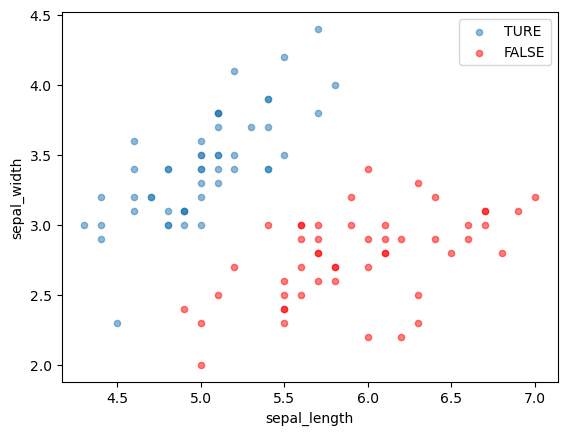

In [3]:
iris_row_df = pd.read_csv('dataset/iris.data')
iris_df = iris_row_df.assign(class_code = iris_row_df.iris_class.apply( lambda x: 0 if x == "Iris-setosa" else 1 if x == "Iris-versicolor" else 2 ) )

df_cap8 = iris_df.query('class_code in [0,1]').loc[:,["sepal_length","sepal_width","class_code"]]

df_cap8_true = df_cap8.query('class_code == 0')
df_cap8_false = df_cap8.query('class_code == 1')

ax = df_cap8_true.plot.scatter(x="sepal_length", y="sepal_width", alpha=0.5, label='TURE')
ax = df_cap8_false.plot.scatter(x="sepal_length", y="sepal_width", c='r', alpha=0.5, label='FALSE',ax=ax)

In [35]:
np.ones((6,1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])